<a href="https://colab.research.google.com/github/4GeeksAcademy/Proyecto_Final_Close-Loop-Intelligence/blob/main/src/Paso5%3A%20Realiza_un_EDA_completo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Paso 5: Realiza un EDA completo

In [3]:
# Cargamos el DataFrame MasterVentas desde la base de datos SQL
import pandas as pd
import sqlite3

# Conexión a la base de datos SQLite BaseSQL.db
conn = sqlite3.connect('BaseSQL.db')

# Cargar el DataFrame MasterVentas desde la tabla SQL
MasterVentas = pd.read_sql_query("SELECT * FROM MasterVentas", conn)

print("--- 1. Explorar Estructura y Valores Faltantes ---")
# Información general del DataFrame
print("Información General del DataFrame MasterVentas:")
MasterVentas.info()

# Resumen de valores faltantes
print("\nValores Faltantes por Columna:")
print(MasterVentas.isnull().sum())

MasterVentas.head()

--- 1. Explorar Estructura y Valores Faltantes ---
Información General del DataFrame MasterVentas:
<class 'pandas.DataFrame'>
RangeIndex: 100178 entries, 0 to 100177
Data columns (total 23 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Fecha                           100178 non-null  str    
 1   Orden ID                        100178 non-null  str    
 2   Cliente ID                      100178 non-null  str    
 3   Nombre del Cliente              100178 non-null  str    
 4   Ciudad Cliente                  100178 non-null  str    
 5   Vendedor ID                     100178 non-null  str    
 6   Ciudad Vendedor                 100178 non-null  str    
 7   Producto ID                     100178 non-null  str    
 8   Categoria Producto              100178 non-null  str    
 9   Peso Producto g                 100178 non-null  float64
 10  Volumen Producto cm3            100178 non-null  flo

,Fecha,Orden ID,Cliente ID,Nombre del Cliente,Ciudad Cliente,Vendedor ID,Ciudad Vendedor,Producto ID,Categoria Producto,Peso Producto g,...,Cantidad,Subtotal Orden,Costo Flete,Total Orden,Total Pago Orden,Tiempo Entrega Estimado (Dias),Estado Orden,Calificacion,Tiempo de Reposicion,ClasificacionABC
0,2017-09-13 08:59:02,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,RJ,48436dade18ac8b2bce089ec2a041202,volta redonda,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,...,1,58.90,13.29,72.19,72.19,15.625671,delivered,5.0,52,A
1,2017-04-26 10:53:06,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,SP,dd7ddc04e1b6c2c614352b383efe2d36,sao paulo,e5f2d52b802189ee658865ca93d83a8f,pet_shop,30000.0,...,1,239.90,19.93,259.83,259.83,18.546458,delivered,4.0,15,A
2,2018-01-14 14:33:31,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,MG,5b51032eddd242adc84c38acab88f23d,borda da mata,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,3050.0,...,1,199.00,17.87,216.87,216.87,21.393391,delivered,5.0,72,A
3,2018-08-08 10:00:35,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,SP,9d7a1d34a5052409006425275ba1c2b4,franca,7634da152a4610f1595efa32f14722fc,perfumaria,200.0,...,1,12.99,12.79,25.78,25.78,11.582928,delivered,4.0,61,B
4,2017-02-04 13:57:51,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,SP,df560393f3a51e74553ab94004ba5c87,loanda,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,3750.0,...,1,199.90,18.14,218.04,218.04,40.418160,delivered,5.0,21,A


### Análisis Univariado

In [4]:
# Estadísticas descriptivas para columnas numéricas

numericals = MasterVentas.select_dtypes(include='number').columns
MasterVentas[numericals].describe()

,Peso Producto g,Volumen Producto cm3,Fotos Producto,Precio Unitario,Cantidad,Subtotal Orden,Costo Flete,Total Orden,Total Pago Orden,Tiempo Entrega Estimado (Dias),Calificacion,Tiempo de Reposicion
count,100178.000000,100178.000000,100178.000000,100178.000000,100178.000000,100178.000000,100178.000000,100178.000000,100178.000000,100178.000000,100178.000000,100178.000000
mean,2094.262652,15178.996915,2.240292,124.356720,1.046208,128.124848,20.143858,148.268706,164.344656,23.815672,4.077223,48.721306
std,3751.189510,23351.280486,1.744268,187.289456,0.277155,191.161264,15.914004,198.249624,221.806879,8.863682,1.352777,30.586694
min,0.000000,168.000000,1.000000,0.850000,1.000000,0.850000,0.000000,6.080000,9.590000,2.008009,1.000000,2.000000
25%,300.000000,2816.000000,1.000000,40.350000,1.000000,43.000000,13.160000,58.050000,63.100000,18.366195,4.000000,21.000000
50%,700.000000,6400.000000,2.000000,78.650000,1.000000,79.900000,16.350000,97.710000,107.715000,23.259444,5.000000,53.000000
75%,1800.000000,18252.000000,3.000000,139.000000,1.000000,142.762500,21.260000,165.800000,182.797500,28.451973,5.000000,75.000000
max,40425.000000,296208.000000,20.000000,6735.000000,21.000000,6735.000000,409.680000,6929.310000,13664.080000,155.135463,5.000000,90.000000


In [5]:
# Análisis de Columnas Categóricas

categorical = ['ClasificacionABC', 'Categoria Producto', 'Estado Orden', 'Ciudad Cliente', 'Ciudad Vendedor']

for col in categorical:
    print(f"\nFrecuencia de Valores en '{col}':")
    print(MasterVentas[col].value_counts())



Frecuencia de Valores en 'ClasificacionABC':
ClasificacionABC
A    82590
B    13245
C     4343
Name: count, dtype: int64

Frecuencia de Valores en 'Categoria Producto':
Categoria Producto
cama_mesa_banho                  10041
beleza_saude                      8954
esporte_lazer                     7806
informatica_acessorios            6844
moveis_decoracao                  6723
                                 ...  
cds_dvds_musicais                   12
la_cuisine                          12
pc_gamer                             8
fashion_roupa_infanto_juvenil        8
seguros_e_servicos                   2
Name: count, Length: 73, dtype: int64

Frecuencia de Valores en 'Estado Orden':
Estado Orden
delivered      98110
shipped         1028
canceled         434
invoiced         309
processing       288
unavailable        7
approved           2
Name: count, dtype: int64

Frecuencia de Valores en 'Ciudad Cliente':
Ciudad Cliente
SP    42178
RJ    12877
MG    11730
RS     5530
PR     50

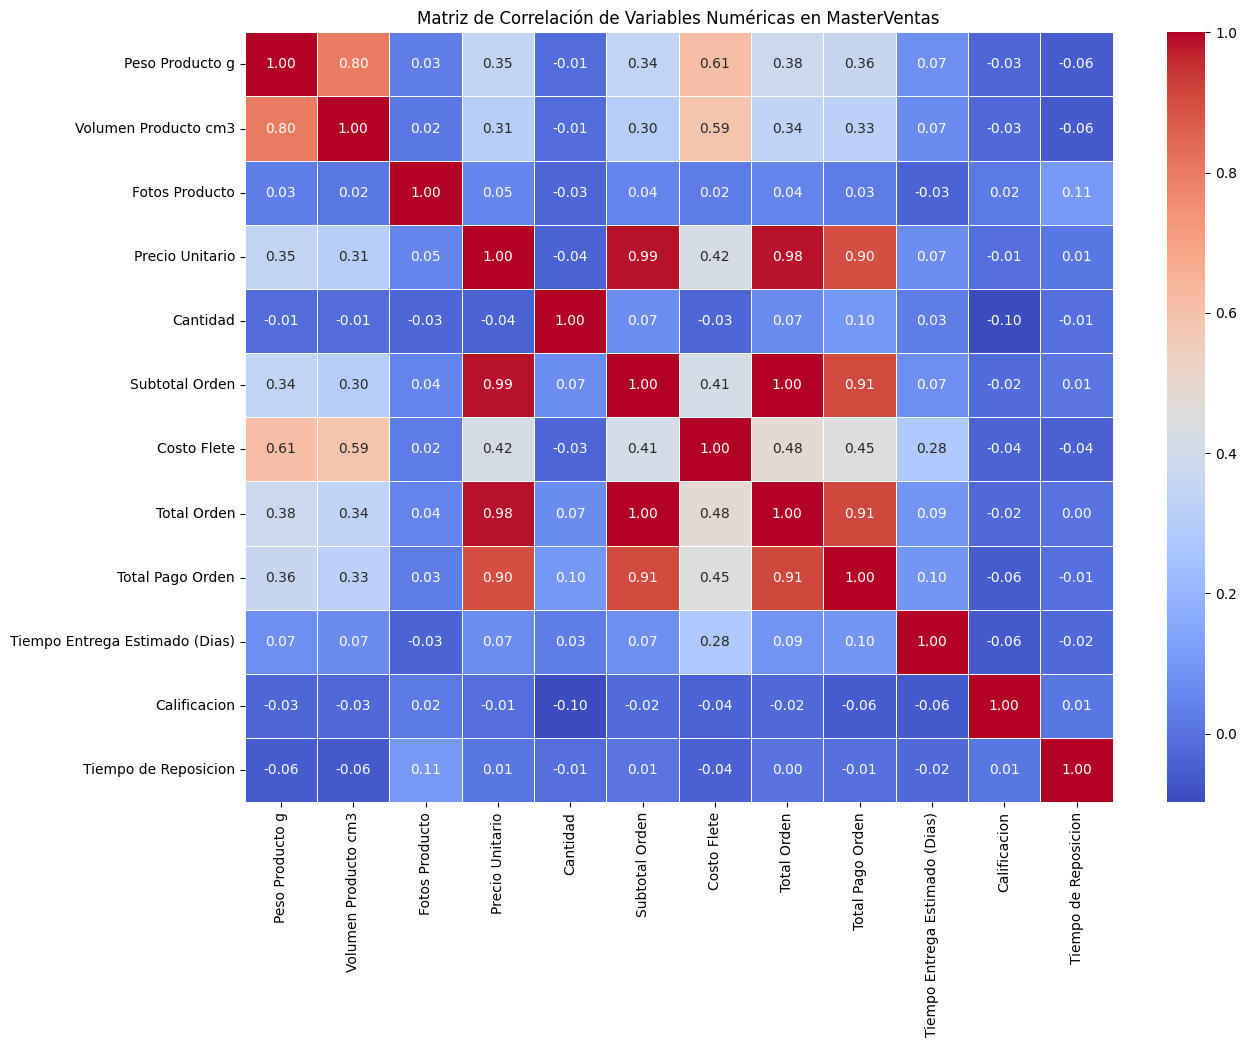

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de correlación
correlation_matrix = MasterVentas[numericals].corr()

# Visualizar la matriz de correlación usando un mapa de calor
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación de Variables Numéricas en MasterVentas')
plt.show()


### Eliminación de variables altamente correlacionadas

Procederemos a eliminar las variables `Subtotal Orden`, `Total Pago Orden` y `Volumen Producto cm3` del DataFrame `MasterVentas` para mitigar los efectos de la multicolinealidad.

In [8]:
# Eliminación de variables altamente correlacionadas

print(f"Dimensiones de MasterVentas antes de eliminar variables: {MasterVentas.shape}")

# Lista de columnas a eliminar
columns_to_drop = ['Subtotal Orden', 'Total Pago Orden', 'Volumen Producto cm3']

# Eliminar las columnas del DataFrame
MasterVentas_cleaned = MasterVentas.drop(columns=columns_to_drop)

print(f"Dimensiones de MasterVentas después de eliminar variables: {MasterVentas_cleaned.shape}")

# Mostrar las primeras filas del DataFrame modificado
display(MasterVentas_cleaned.head())

Dimensiones de MasterVentas antes de eliminar variables: (100178, 23)
Dimensiones de MasterVentas después de eliminar variables: (100178, 20)


,Fecha,Orden ID,Cliente ID,Nombre del Cliente,Ciudad Cliente,Vendedor ID,Ciudad Vendedor,Producto ID,Categoria Producto,Peso Producto g,Fotos Producto,Precio Unitario,Cantidad,Costo Flete,Total Orden,Tiempo Entrega Estimado (Dias),Estado Orden,Calificacion,Tiempo de Reposicion,ClasificacionABC
0,2017-09-13 08:59:02,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,RJ,48436dade18ac8b2bce089ec2a041202,volta redonda,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,650.0,4.0,58.90,1,13.29,72.19,15.625671,delivered,5.0,52,A
1,2017-04-26 10:53:06,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,eb28e67c4c0b83846050ddfb8a35d051,SP,dd7ddc04e1b6c2c614352b383efe2d36,sao paulo,e5f2d52b802189ee658865ca93d83a8f,pet_shop,30000.0,2.0,239.90,1,19.93,259.83,18.546458,delivered,4.0,15,A
2,2018-01-14 14:33:31,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,3818d81c6709e39d06b2738a8d3a2474,MG,5b51032eddd242adc84c38acab88f23d,borda da mata,c777355d18b72b67abbeef9df44fd0fd,moveis_decoracao,3050.0,2.0,199.00,1,17.87,216.87,21.393391,delivered,5.0,72,A
3,2018-08-08 10:00:35,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,af861d436cfc08b2c2ddefd0ba074622,SP,9d7a1d34a5052409006425275ba1c2b4,franca,7634da152a4610f1595efa32f14722fc,perfumaria,200.0,1.0,12.99,1,12.79,25.78,11.582928,delivered,4.0,61,B
4,2017-02-04 13:57:51,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,64b576fb70d441e8f1b2d7d446e483c5,SP,df560393f3a51e74553ab94004ba5c87,loanda,ac6c3623068f30de03045865e4e10089,ferramentas_jardim,3750.0,1.0,199.90,1,18.14,218.04,40.418160,delivered,5.0,21,A


### Análisis de la Distribución de la Columna 'Cantidad'

Para comprender mejor la distribución de la cantidad de productos vendidos por orden, crearemos un histograma y un diagrama de caja. Esto nos permitirá visualizar la frecuencia de cada valor y detectar posibles valores atípicos.

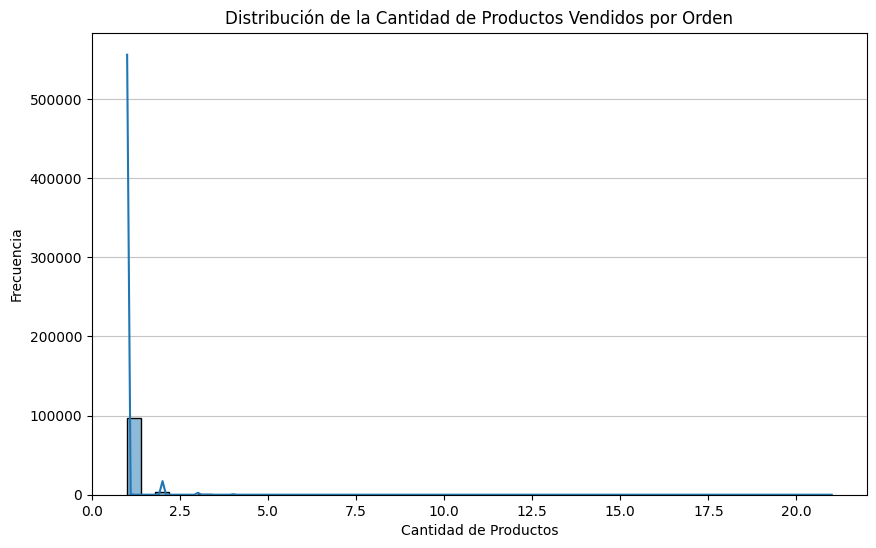

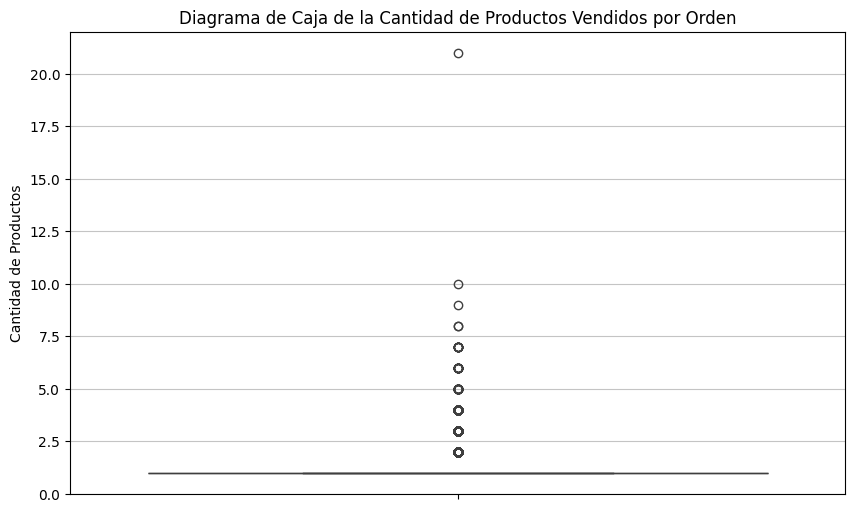


Estadísticas Descriptivas para 'Cantidad':


count    100178.000000
mean          1.046208
std           0.277155
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          21.000000
Name: Cantidad, dtype: float64

In [9]:
#Análisis de la Distribución de la Columna 'Cantidad'

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histograma de la columna 'Cantidad'
plt.figure(figsize=(10, 6))
sns.histplot(MasterVentas_cleaned['Cantidad'], bins=50, kde=True)
plt.title('Distribución de la Cantidad de Productos Vendidos por Orden')
plt.xlabel('Cantidad de Productos')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.show()

# 2. Diagrama de caja (box plot) de la columna 'Cantidad'
plt.figure(figsize=(10, 6))
sns.boxplot(y=MasterVentas_cleaned['Cantidad'])
plt.title('Diagrama de Caja de la Cantidad de Productos Vendidos por Orden')
plt.ylabel('Cantidad de Productos')
plt.grid(axis='y', alpha=0.75)
plt.show()

# 3. Estadísticas descriptivas de la columna 'Cantidad'
print("\nEstadísticas Descriptivas para 'Cantidad':")
display(MasterVentas_cleaned['Cantidad'].describe())

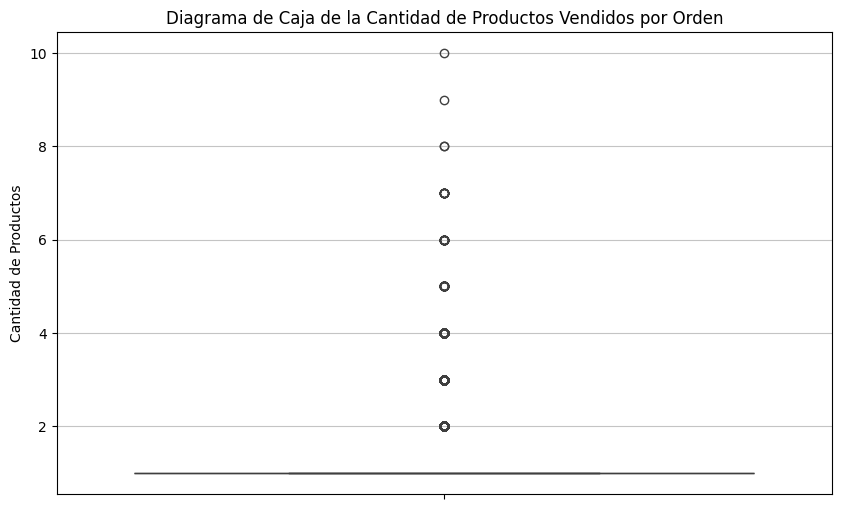


Estadísticas Descriptivas para 'Cantidad':


count    100177.000000
mean          1.046009
std           0.269891
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          10.000000
Name: Cantidad, dtype: float64

In [10]:
#Quitamos ordenes con cantidades mayores a 10

MasterVentas_cleaned = MasterVentas_cleaned.loc[MasterVentas_cleaned['Cantidad'] <= 10]

# 2. Diagrama de caja (box plot) de la columna 'Cantidad'
plt.figure(figsize=(10, 6))
sns.boxplot(y=MasterVentas_cleaned['Cantidad'])
plt.title('Diagrama de Caja de la Cantidad de Productos Vendidos por Orden')
plt.ylabel('Cantidad de Productos')
plt.grid(axis='y', alpha=0.75)
plt.show()

# 3. Estadísticas descriptivas de la columna 'Cantidad'
print("\nEstadísticas Descriptivas para 'Cantidad':")
display(MasterVentas_cleaned['Cantidad'].describe())

/tmp/ipykernel_11392/1812046545.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=MasterVentas_cleaned, x='ClasificacionABC', palette='viridis')


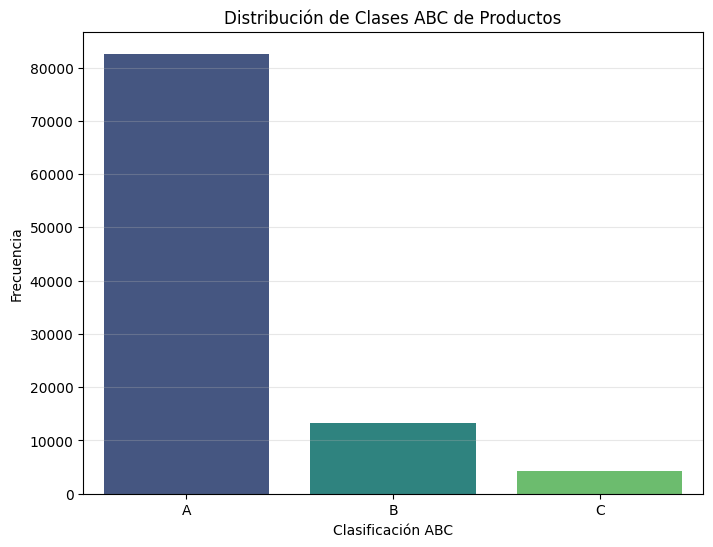


Distribución de 'ClasificacionABC':
ClasificacionABC
A    82589
B    13245
C     4343
Name: count, dtype: int64


In [11]:
#Análisis de la Distribución de ClasificacionABC

import matplotlib.pyplot as plt
import seaborn as sns

# Crear un countplot para visualizar la distribución de 'ClasificacionABC'
plt.figure(figsize=(8, 6))
sns.countplot(data=MasterVentas_cleaned, x='ClasificacionABC', palette='viridis')
plt.title('Distribución de Clases ABC de Productos')
plt.xlabel('Clasificación ABC')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.3)
plt.show()

# También se puede imprimir los valores exactos de la distribución
print("\nDistribución de 'ClasificacionABC':")
print(MasterVentas_cleaned['ClasificacionABC'].value_counts())

## Análisis Bivariado: Categóricas vs. ClasificacionABC



--- Análisis de 'Categoria Producto' vs 'ClasificacionABC' ---


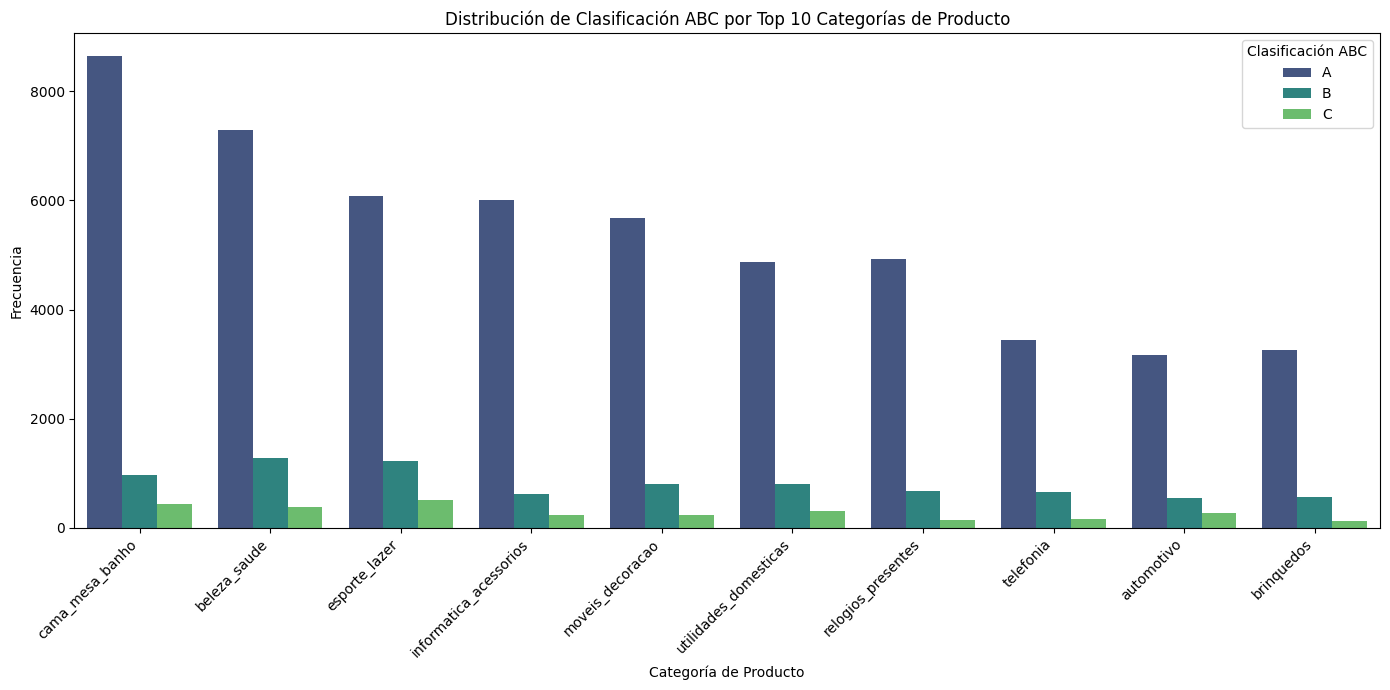


Tabla de Contingencia para 'Categoria Producto' vs 'ClasificacionABC' (porcentajes por fila):


ClasificacionABC,A,B,C
Categoria Producto,,,
agro_industria_e_comercio,74.863388,22.950820,2.185792
alimentos,91.071429,5.357143,3.571429
alimentos_bebidas,67.811159,25.321888,6.866953
artes,83.000000,13.500000,3.500000
artes_e_artesanato,62.500000,25.000000,12.500000
artigos_de_festas,76.923077,20.512821,2.564103
artigos_de_natal,94.531250,5.468750,0.000000
audio,84.149856,13.832853,2.017291
automotivo,79.622166,13.753149,6.624685


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

categorical_vars = ['Categoria Producto', 'Estado Orden', 'Ciudad Cliente', 'Ciudad Vendedor']

# 1. 'Categoria Producto' vs 'ClasificacionABC'
print("\n--- Análisis de 'Categoria Producto' vs 'ClasificacionABC' ---")

# Seleccionar las top 10 categorías de productos por frecuencia para visualización
top_categorias = MasterVentas_cleaned['Categoria Producto'].value_counts().nlargest(10).index
df_top_categorias = MasterVentas_cleaned[MasterVentas_cleaned['Categoria Producto'].isin(top_categorias)]

plt.figure(figsize=(14, 7))
sns.countplot(data=df_top_categorias, x='Categoria Producto', hue='ClasificacionABC', palette='viridis', order=top_categorias)
plt.title('Distribución de Clasificación ABC por Top 10 Categorías de Producto')
plt.xlabel('Categoría de Producto')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Clasificación ABC')
plt.tight_layout()
plt.show()

print("\nTabla de Contingencia para 'Categoria Producto' vs 'ClasificacionABC' (porcentajes por fila):")
contingency_table_cat_prod = pd.crosstab(MasterVentas_cleaned['Categoria Producto'], MasterVentas_cleaned['ClasificacionABC'], normalize='index') * 100
display(contingency_table_cat_prod.head(10)) # Mostrar las primeras 10 para concisión


--- Análisis de 'Estado Orden' vs 'ClasificacionABC' ---


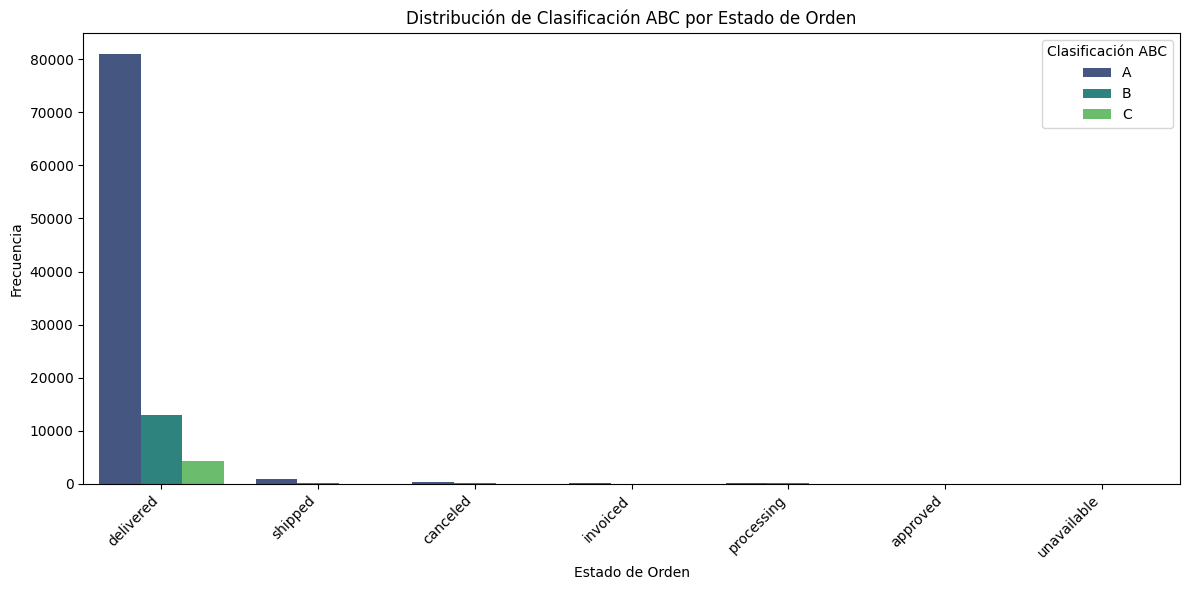


Tabla de Contingencia para 'Estado Orden' vs 'ClasificacionABC' (porcentajes por fila):


ClasificacionABC,A,B,C
Estado Orden,,,
approved,100.000000,0.000000,0.000000
canceled,78.341014,15.668203,5.990783
delivered,82.501096,13.171065,4.327839
invoiced,76.699029,17.799353,5.501618
processing,72.916667,21.875000,5.208333
shipped,82.879377,13.326848,3.793774
unavailable,100.000000,0.000000,0.000000


In [13]:
print(
"\n--- Análisis de 'Estado Orden' vs 'ClasificacionABC' ---"
)

plt.figure(figsize=(12, 6))
sns.countplot(
    data=MasterVentas_cleaned,
    x='Estado Orden',
    hue='ClasificacionABC',
    palette='viridis'
)
plt.title('Distribución de Clasificación ABC por Estado de Orden')
plt.xlabel('Estado de Orden')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Clasificación ABC')
plt.tight_layout()
plt.show()

print(
    "\nTabla de Contingencia para 'Estado Orden' vs 'ClasificacionABC' (porcentajes por fila):"
)
contingency_table_estado_orden = pd.crosstab(
    MasterVentas_cleaned['Estado Orden'],
    MasterVentas_cleaned['ClasificacionABC'],
    normalize='index'
) * 100
display(contingency_table_estado_orden)


--- Análisis de 'Ciudad Cliente' vs 'ClasificacionABC' ---


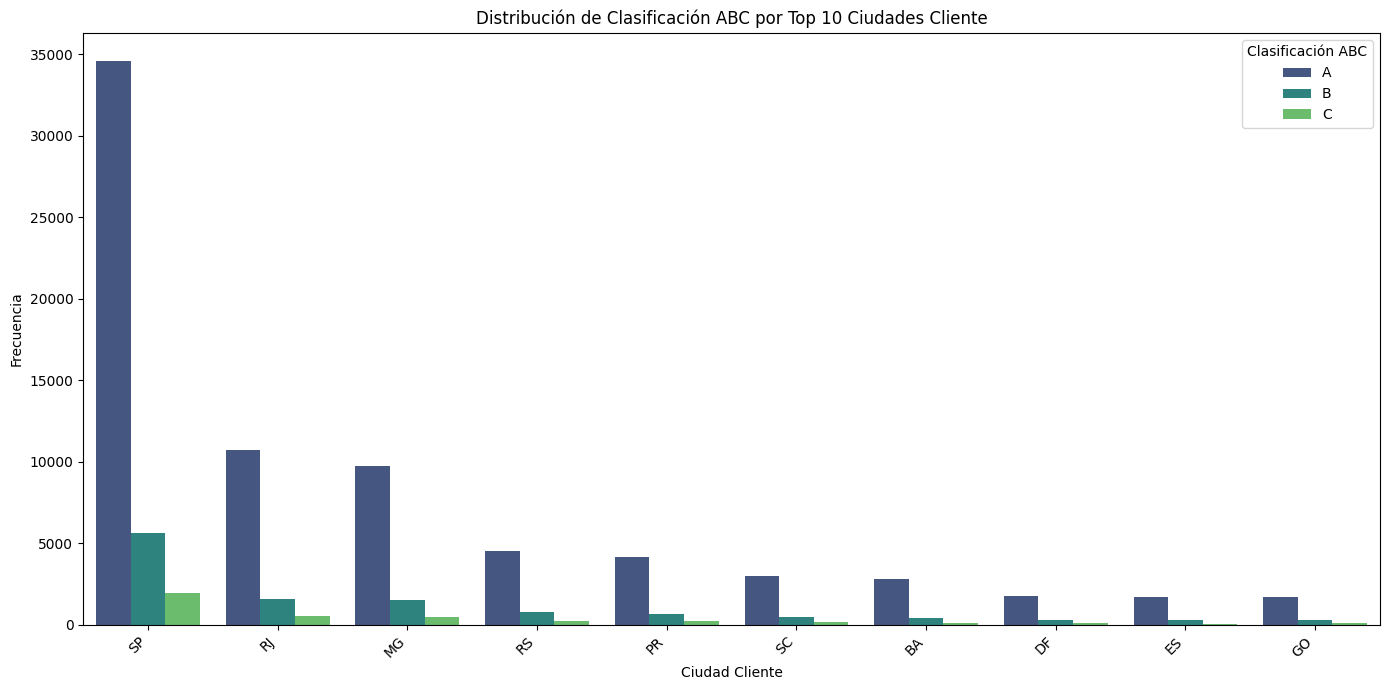


Tabla de Contingencia para 'Ciudad Cliente' vs 'ClasificacionABC' (porcentajes por fila):


ClasificacionABC,A,B,C
Ciudad Cliente,,,
AC,81.250000,15.000000,3.750000
AL,79.176755,15.012107,5.811138
AM,78.378378,16.216216,5.405405
AP,82.857143,14.285714,2.857143
BA,83.465959,12.555261,3.978780
CE,81.058911,15.212528,3.728561
DF,82.572614,13.278008,4.149378
ES,83.764018,12.920527,3.315456
GO,82.544379,13.264300,4.191321


In [14]:
print(
"\n--- Análisis de 'Ciudad Cliente' vs 'ClasificacionABC' ---"
)

# Seleccionar las top 10 ciudades de clientes por frecuencia para visualización
top_ciudades_clientes = MasterVentas_cleaned['Ciudad Cliente'].value_counts().nlargest(10).index
df_top_ciudades_clientes = MasterVentas_cleaned[MasterVentas_cleaned['Ciudad Cliente'].isin(top_ciudades_clientes)]

plt.figure(figsize=(14, 7))
sns.countplot(
    data=df_top_ciudades_clientes,
    x='Ciudad Cliente',
    hue='ClasificacionABC',
    palette='viridis',
    order=top_ciudades_clientes
)
plt.title('Distribución de Clasificación ABC por Top 10 Ciudades Cliente')
plt.xlabel('Ciudad Cliente')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Clasificación ABC')
plt.tight_layout()
plt.show()

print(
    "\nTabla de Contingencia para 'Ciudad Cliente' vs 'ClasificacionABC' (porcentajes por fila):"
)
contingency_table_ciudad_cliente = pd.crosstab(
    MasterVentas_cleaned['Ciudad Cliente'],
    MasterVentas_cleaned['ClasificacionABC'],
    normalize='index'
) * 100
display(contingency_table_ciudad_cliente.head(10))


--- Análisis de 'Ciudad Vendedor' vs 'ClasificacionABC' ---


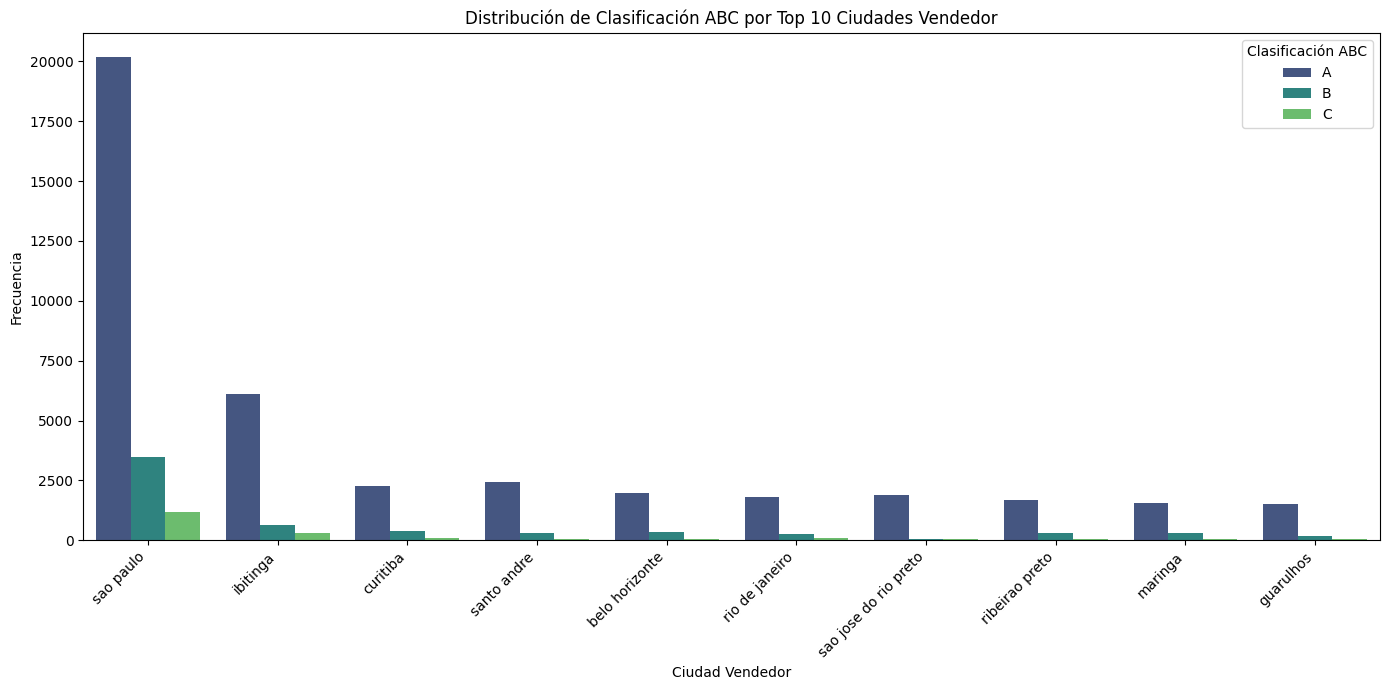


Tabla de Contingencia para 'Ciudad Vendedor' vs 'ClasificacionABC' (porcentajes por fila):


ClasificacionABC,A,B,C
Ciudad Vendedor,,,
04482255,100.000000,0.000000,0.000000
abadia de goias,0.000000,100.000000,0.000000
afonso claudio,80.000000,20.000000,0.000000
aguas claras df,100.000000,0.000000,0.000000
alambari,100.000000,0.000000,0.000000
alfenas,74.242424,19.696970,6.060606
almirante tamandare,100.000000,0.000000,0.000000
alvares machado,83.333333,16.666667,0.000000
alvorada,85.714286,14.285714,0.000000


In [15]:
print(
"\n--- Análisis de 'Ciudad Vendedor' vs 'ClasificacionABC' ---"
)

# Seleccionar las top 10 ciudades de vendedores por frecuencia para visualización
top_ciudades_vendedores = MasterVentas_cleaned['Ciudad Vendedor'].value_counts().nlargest(10).index
df_top_ciudades_vendedores = MasterVentas_cleaned[MasterVentas_cleaned['Ciudad Vendedor'].isin(top_ciudades_vendedores)]

plt.figure(figsize=(14, 7))
sns.countplot(
    data=df_top_ciudades_vendedores,
    x='Ciudad Vendedor',
    hue='ClasificacionABC',
    palette='viridis',
    order=top_ciudades_vendedores
)
plt.title('Distribución de Clasificación ABC por Top 10 Ciudades Vendedor')
plt.xlabel('Ciudad Vendedor')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Clasificación ABC')
plt.tight_layout()
plt.show()

print(
    "\nTabla de Contingencia para 'Ciudad Vendedor' vs 'ClasificacionABC' (porcentajes por fila):"
)
contingency_table_ciudad_vendedor = pd.crosstab(
    MasterVentas_cleaned['Ciudad Vendedor'],
    MasterVentas_cleaned['ClasificacionABC'],
    normalize='index'
) * 100
display(contingency_table_ciudad_vendedor.head(10))


## Análisis Bivariado: Numéricas vs. ClasificacionABC


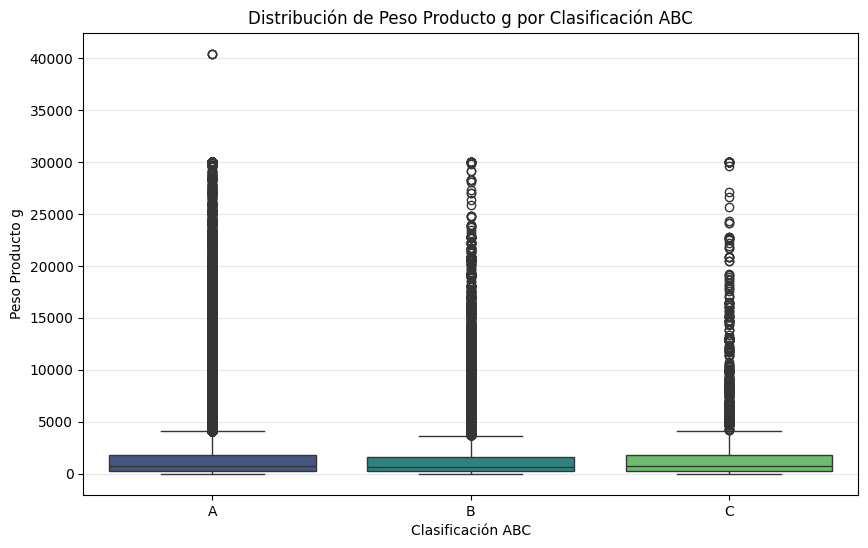

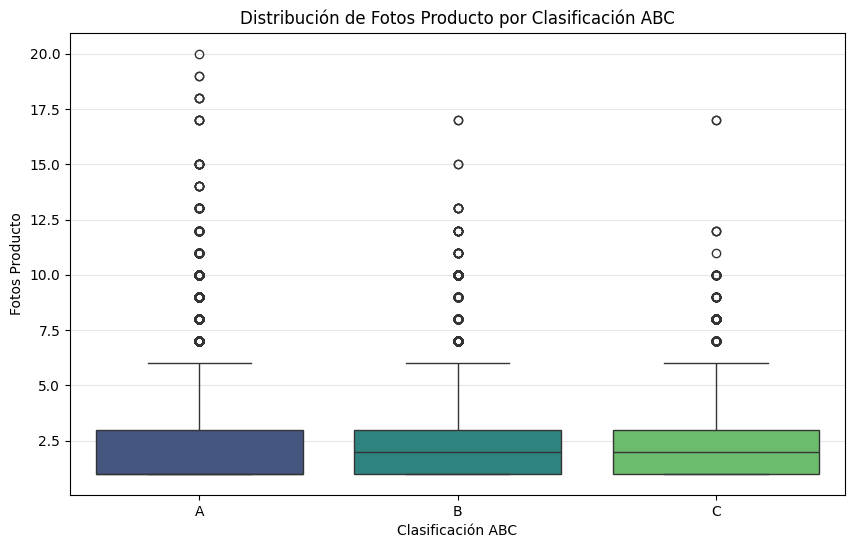

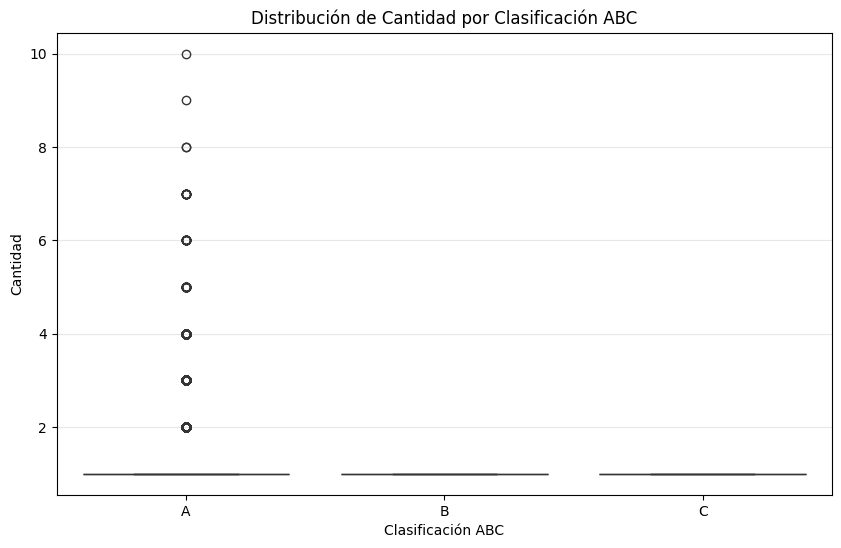

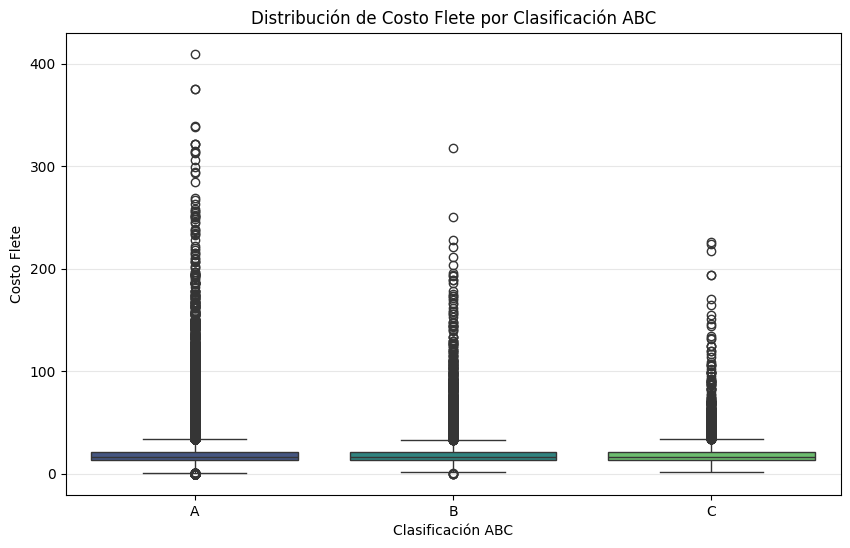

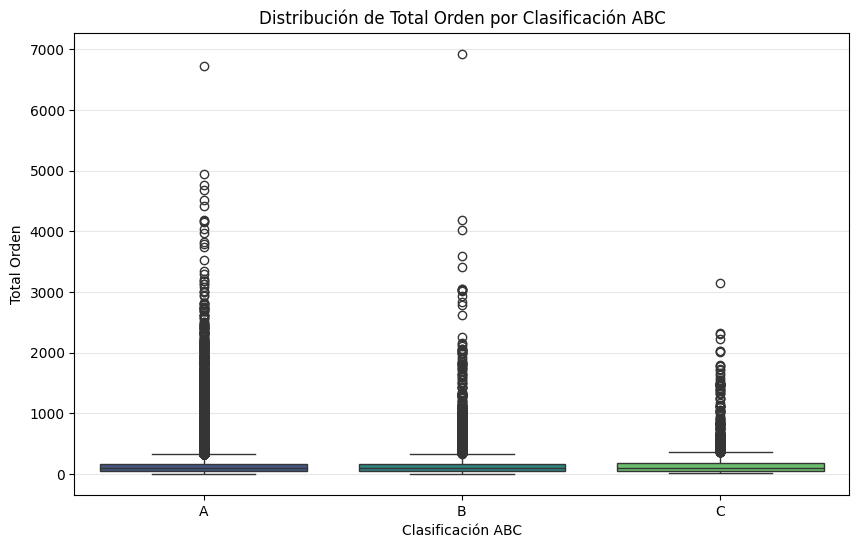

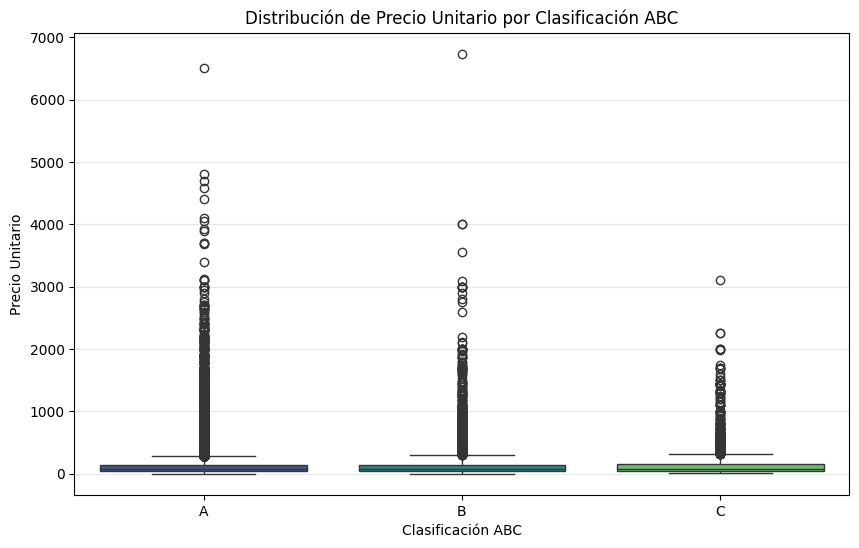

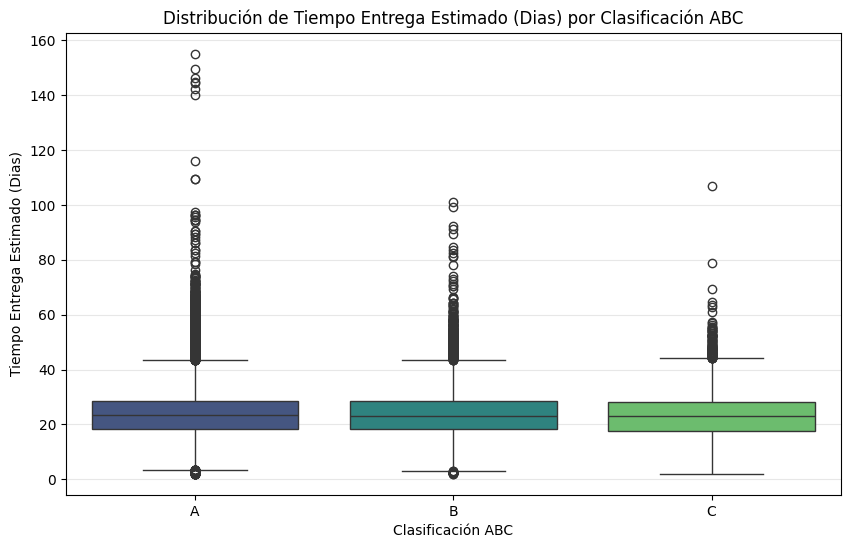

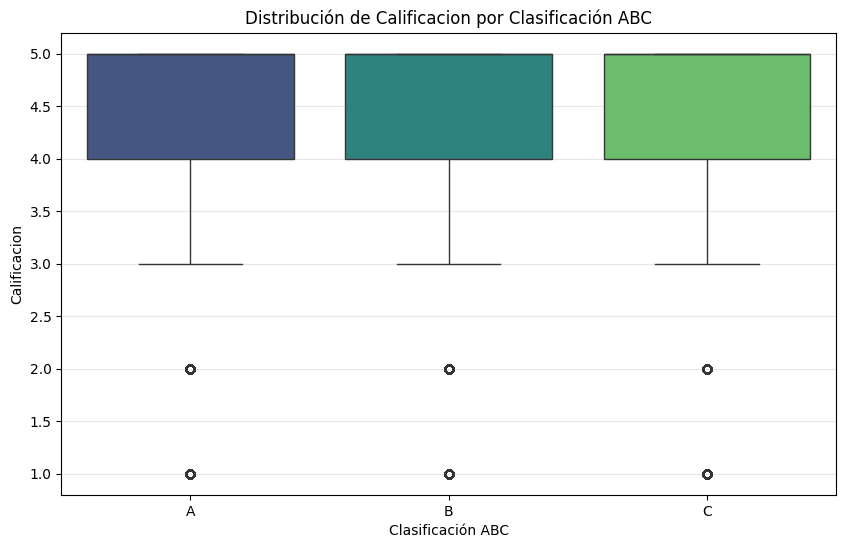

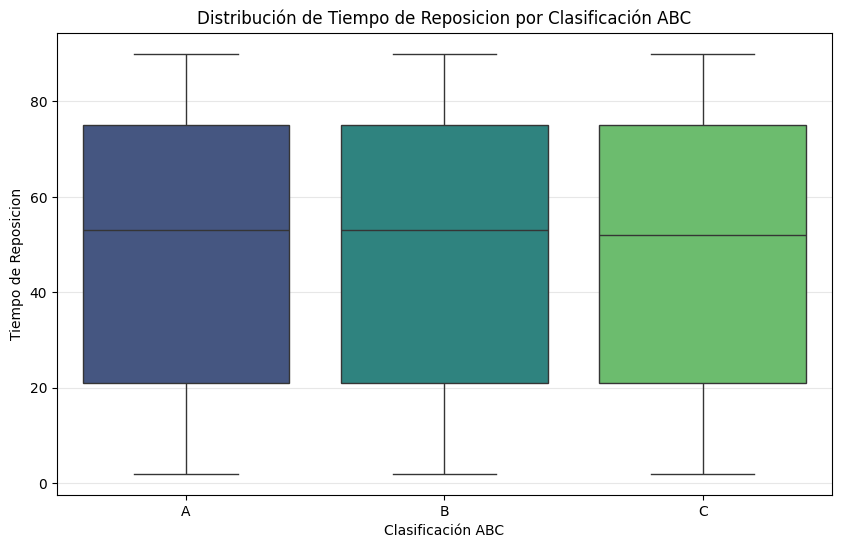

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols_to_analyze = [
    'Peso Producto g',
    'Fotos Producto',
    'Cantidad',
    'Costo Flete',
    'Total Orden',
    'Precio Unitario',
    'Tiempo Entrega Estimado (Dias)',
    'Calificacion',
    'Tiempo de Reposicion'
]

for col in numerical_cols_to_analyze:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=MasterVentas_cleaned, x='ClasificacionABC', y=col, palette='viridis', hue='ClasificacionABC', legend=False)
    plt.title(f'Distribución de {col} por Clasificación ABC')
    plt.xlabel('Clasificación ABC')
    plt.ylabel(col)
    plt.grid(axis='y', alpha=0.3)
    plt.show()

## Visualización de Correlaciones por Clase

Crear mapas de calor de correlación para las variables numéricas, segmentados por cada clase de 'ClasificacionABC', para observar si existen patrones de correlación diferentes entre las clases.


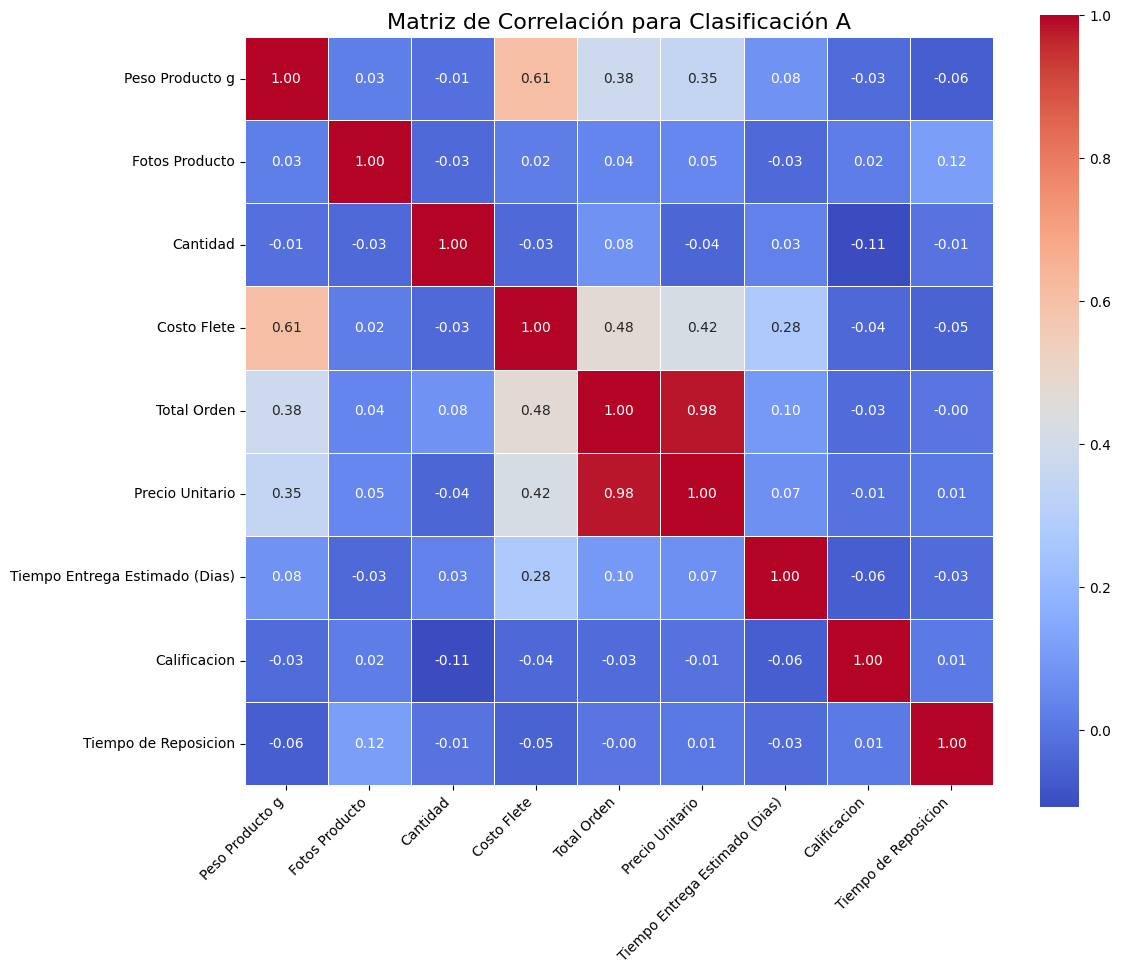

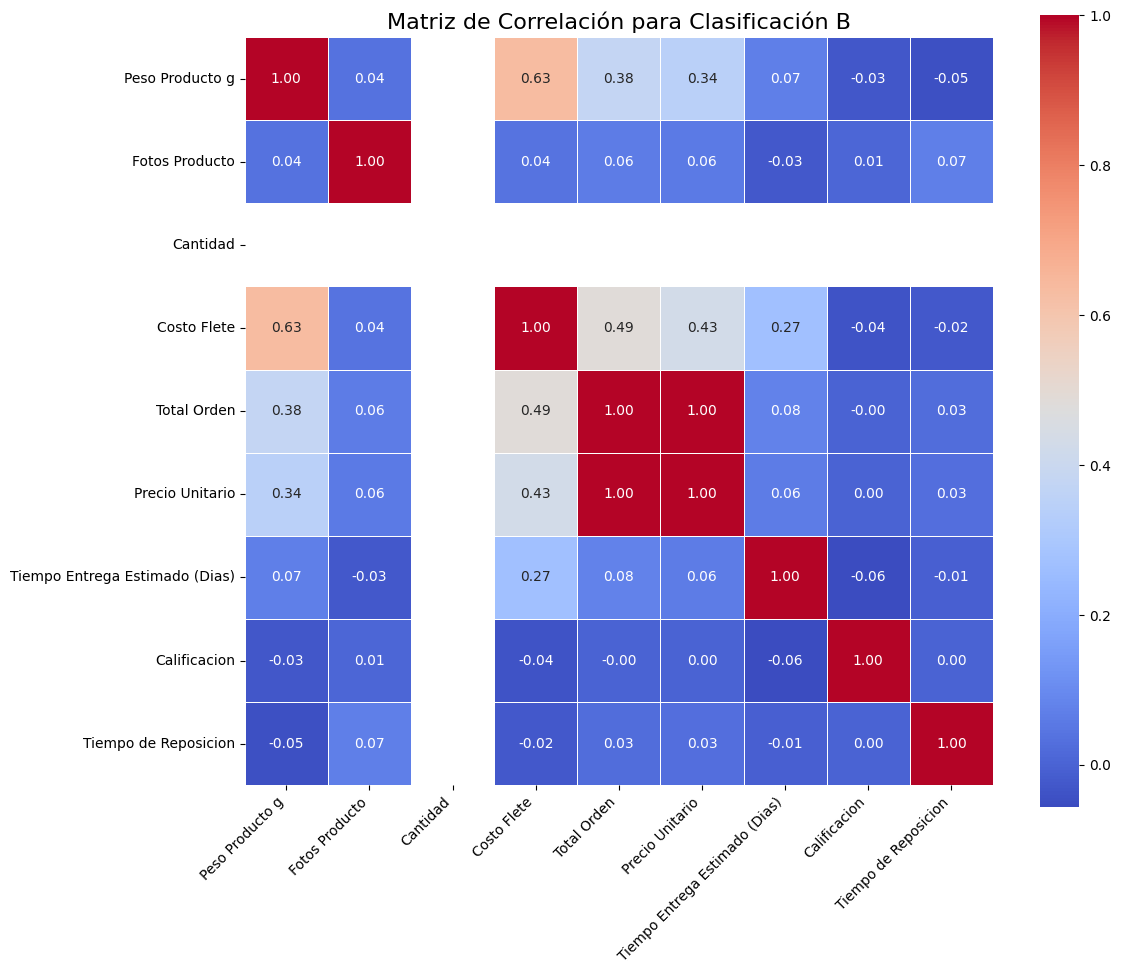

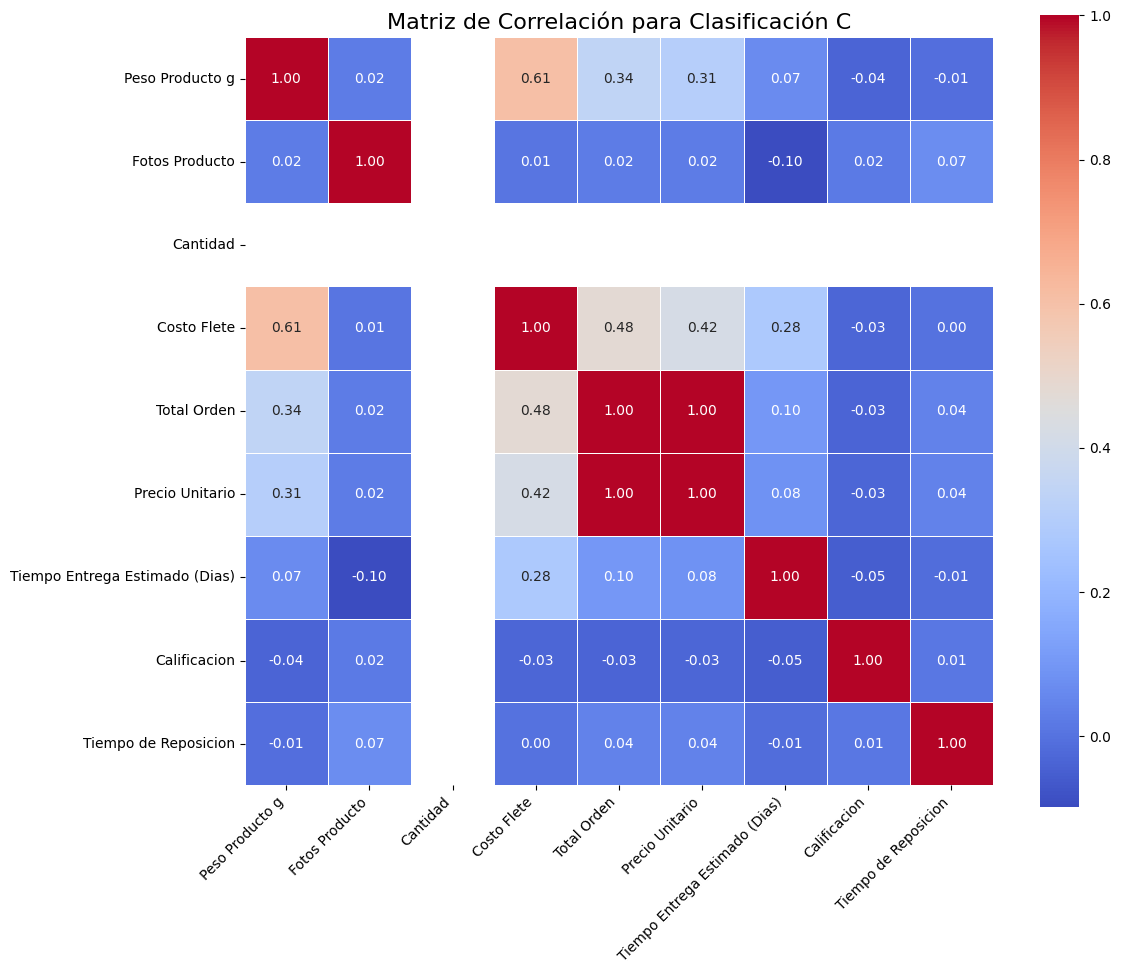

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

numerical_cols_for_correlation = [
    'Peso Producto g',
    'Fotos Producto',
    'Cantidad',
    'Costo Flete',
    'Total Orden',
    'Precio Unitario',
    'Tiempo Entrega Estimado (Dias)',
    'Calificacion',
    'Tiempo de Reposicion'
]

# Obtener las clases únicas de ClasificacionABC
clasificaciones = MasterVentas_cleaned['ClasificacionABC'].unique()

for clasificacion in clasificaciones:
    # a. Filtrar el DataFrame para la clase actual
    df_class = MasterVentas_cleaned[MasterVentas_cleaned['ClasificacionABC'] == clasificacion]

    # b. Seleccionar las columnas numéricas relevantes
    df_numerical = df_class[numerical_cols_for_correlation]

    # c. Calcular la matriz de correlación
    correlation_matrix_class = df_numerical.corr()

    # d. Generar el mapa de calor
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        correlation_matrix_class,
        annot=True,
        cmap='coolwarm',
        fmt=".2f",
        linewidths=.5,
        square=True
    )
    plt.title(f'Matriz de Correlación para Clasificación {clasificacion}', fontsize=16)
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


## Resumen del Análisis Exploratorio de Datos (EDA)

### Hallazgos Clave del EDA:

1.  **Desequilibrio de Clases en `ClasificacionABC`:**
    *   La variable objetivo `ClasificacionABC` presenta un desequilibrio significativo:
        *   Clase 'A': 82,249 instancias (dominante)
        *   Clase 'B': 13,177 instancias
        *   Clase 'C': 4,317 instancias (minoritaria)
    *   Este desequilibrio es crucial y deberá abordarse en la fase de preparación de datos para evitar que el modelo se incline excesivamente hacia la clase mayoritaria.

2.  **Relación con Variables Categóricas:**
    *   **`Categoria Producto`**: Se observa una fuerte relación con `ClasificacionABC`. Por ejemplo, categorías como `alimentos` tienen una proporción muy alta de clasificación 'A' (más del 91%), mientras que `artes_e_artesanato` muestra una proporción más elevada de clasificación 'C' (12.50%) en comparación con otras. Esto sugiere que la categoría del producto es un predictor importante.
    *   **`Estado Orden`**: Los estados de orden `approved` y `unavailable` están exclusivamente asociados a la clasificación 'A'. Otros estados como `delivered` también muestran una predominancia de 'A' (82.50%). Esto indica que el estado de la orden podría ser un indicador de la rotación del producto.
    *   **`Ciudad Cliente`**: Aunque existe una distribución ABC en todas las ciudades principales, la proporción de cada clase (`A` alrededor del 79-84%, `B` del 12-16%, `C` del 3-6%) es relativamente consistente en las top 10 ciudades. Esto podría significar que la ciudad del cliente no es un diferenciador tan fuerte en sí misma para la clasificación ABC, a menos que se analicen ciudades con menor frecuencia.
    *   **`Ciudad Vendedor`**: Muestra una mayor variabilidad y, por lo tanto, una relación más fuerte con `ClasificacionABC`. Algunas ciudades vendedoras tienen un 100% de productos en la clase 'A' o 'B', lo que sugiere que la ubicación del vendedor puede influir significativamente en la rotación de los productos que ofrecen.

3.  **Relación con Variables Numéricas:**
    *   Los box plots revelaron diferencias en las distribuciones de variables numéricas (`Peso Producto g`, `Fotos Producto`, `Cantidad`, `Costo Flete`, `Total Orden`, `Tiempo Entrega Estimado (Dias)`, `Calificacion`, `Tiempo de Reposicion`) a través de las clases 'A', 'B' y 'C'.
    *   Por ejemplo, los productos de la clase 'A' podrían tener, en promedio, una mayor `Cantidad` vendida o un `Costo Flete` diferente en comparación con las clases 'B' o 'C'. `Calificacion` parece tener una distribución similar entre las clases, siendo alta para la mayoría.

4.  **Patrones de Correlación por Clase:**
    *   Los mapas de calor de correlación, segmentados por cada clase de `ClasificacionABC`, mostraron que las relaciones entre las variables numéricas varían significativamente. Esto implica que la importancia y la interacción de ciertas características numéricas pueden ser diferentes para productos de alta rotación (A) versus productos de baja rotación (C).

### **Manejo del Desequilibrio de Clases:**
    

In [ ]:
# Próximos pasos

1.  **Manejo del Desequilibrio de Clases:**
    *   Implementar técnicas de re-muestreo como **oversampling** (e.g., SMOTE) para las clases minoritarias ('B' y 'C') o **undersampling** para la clase mayoritaria ('A').
    *   Considerar el uso de algoritmos de clasificación que sean robustos ante el desequilibrio de clases, o métricas de evaluación que no se vean afectadas por este (e.g., F1-score, recall, precision, AUC-PR).

2.  **Ingeniería de Características (Feature Engineering):**
    *   **Variables Categóricas**: Aplicar técnicas de codificación adecuadas. Para `Estado Orden`, una codificación One-Hot podría ser apropiada. Para `Categoria Producto` y `Ciudad Vendedor`, dado su mayor número de categorías, se podría explorar la **Codificación de Frecuencia** o la **Codificación Target** para crear características numéricas más informativas.
    *   **Variables Numéricas**: Evaluar si se requieren transformaciones (e.g., logarítmica) para normalizar distribuciones sesgadas o para linealizar relaciones con la variable objetivo. Considerar la creación de nuevas características a partir de combinaciones de las existentes si el análisis de correlación lo sugiere.

3.  **Selección de Características (Feature Selection):**
    *   Utilizar técnicas para seleccionar las características más relevantes y predictivas para el modelo, lo que puede ayudar a reducir la complejidad y mejorar el rendimiento. Esto podría incluir métodos basados en la importancia de las características (e.g., de modelos basados en árboles) o pruebas estadísticas.

4.  **Preparación para el Modelo:**
    *   Dividir el dataset en conjuntos de entrenamiento, validación y prueba.
    *   Escalar las variables numéricas (e.g., estandarización o normalización) si el modelo a utilizar es sensible a la escala de las características (como regresión logística o máquinas de vectores de soporte).

5.  **Elección del Modelo y Entrenamiento:**
    *   Dada la naturaleza de clasificación, se pueden explorar modelos como **Random Forest Classifier**, **Gradient Boosting Machines (XGBoost, LightGBM)**, **Regresión Logística**, o incluso **redes neuronales** para la clasificación de `ClasificacionABC`.